In [13]:
import numpy as np 
import pandas as pd 

#Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns 
import math
%matplotlib inline


In [3]:
df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

C:\Users\user\Anaconda3\envs\py37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [6]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [8]:
import datetime as dt
import time, datetime

# Convert "Closed Date" to datetime dtype
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['Closed Date'].dtype
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Created Date'].dtype

dtype('<M8[ns]')

In [9]:
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']

df['Request_Closing_Time'].head()

0   00:55:15
1   01:26:16
2   04:51:31
3   07:45:14
4   03:27:02
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [10]:
def toHr(timeDel):
    days = timeDel.days
    hours = round(timeDel.seconds/3600, 2)
    result = (days * 24) + hours
    return result

In [11]:
df['Request_Closing_In_Hr'] = df['Request_Closing_Time'].apply(toHr)

df['Request_Closing_In_Hr'].head()

0    0.92
1    1.44
2    4.86
3    7.75
4    3.45
Name: Request_Closing_In_Hr, dtype: float64

In [14]:
def hrToCategory(hr):
    if (math.isnan(hr)):
        return 'Unspecified'
    elif (hr < 2.0):
        return 'Fast'
    elif (4.0 > hr >= 2.0):
        return 'Acceptable'
    elif (6.0 > hr >= 4.0):
        return 'Slow'
    else:
        return 'Very Slow'

In [15]:
df['Request_Closing_Time_Category'] = df['Request_Closing_In_Hr'].apply(hrToCategory)

df['Request_Closing_Time_Category'].head()

0          Fast
1          Fast
2          Slow
3     Very Slow
4    Acceptable
Name: Request_Closing_Time_Category, dtype: object

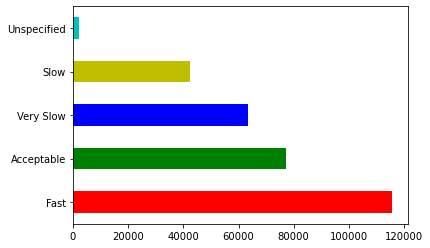

In [20]:
df['Request_Closing_Time_Category'].value_counts()
df['Request_Closing_Time_Category'].value_counts().plot(kind="barh", color=list('rgbyc'))
plt.show()

In [21]:
monthSeries = pd.Series({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
print(monthSeries)
print(monthSeries[12])

1     Jan
2     Feb
3     Mar
4     Apr
5     May
6     Jun
7     Jul
8     Aug
9     Sep
10    Oct
11    Nov
12    Dec
dtype: object
Dec


In [23]:
def getMonth(cDate):
    a = str(cDate)
    datee = datetime.datetime.strptime(a, "%Y-%m-%d %H:%M:%S")
    return monthSeries[datee.month]
df['Created_Month'] = df['Created Date'].apply(getMonth)
df['Created_Month']

0         Dec
1         Dec
2         Dec
3         Dec
4         Dec
         ... 
300693    Mar
300694    Mar
300695    Mar
300696    Mar
300697    Mar
Name: Created_Month, Length: 300698, dtype: object

In [24]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_In_Hr,Request_Closing_Time_Category,Created_Month
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15,0.92,Fast,Dec
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16,1.44,Fast,Dec
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31,4.86,Slow,Dec
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14,7.75,Very Slow,Dec
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02,3.45,Acceptable,Dec


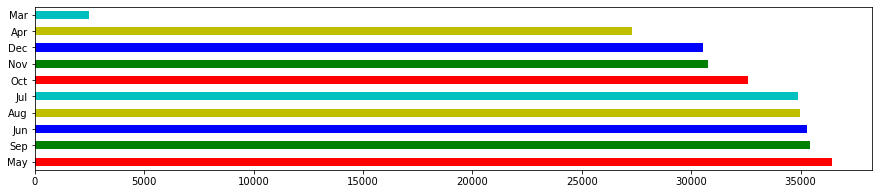

In [26]:
df['Created_Month'].value_counts()
df['Created_Month'].value_counts().plot(kind="barh", color=list('rgbyc'), figsize=(15,3))
plt.show()

In [27]:
dfo = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")


C:\Users\user\Anaconda3\envs\py37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
dfo[dfo['Created Date'].str.startswith('01/')]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location


In [29]:
df['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

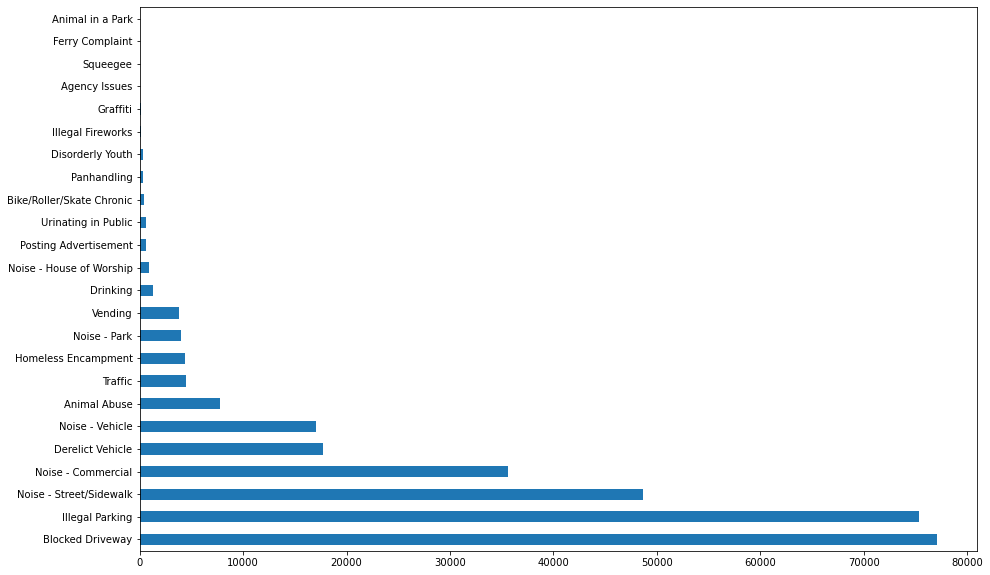

In [30]:
df['Complaint Type'].value_counts().plot(kind="barh", figsize=(15,10))
plt.show()

In [33]:
df['City'].isnull().sum()

2614

In [35]:
df['City'].fillna('Not Available', inplace=True)
df['City'].head()

0    NEW YORK
1     ASTORIA
2       BRONX
3       BRONX
4    ELMHURST
Name: City, dtype: object

In [37]:
dfg = df.groupby(['City', 'Complaint Type'])

In [38]:
df_mean = dfg.mean()['Request_Closing_In_Hr']
df_mean.isnull().sum()

4

In [39]:
dfg = df.groupby(['City','Complaint Type']).agg({'Request_Closing_In_Hr': 'mean'})
dfg

Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[782 rows x 1 columns]

In [40]:
dfg[dfg['Request_Closing_In_Hr'].isnull()]

Request_Closing_In_Hr
City          Complaint Type                                 
Not Available Ferry Complaint                             NaN
              Noise - House of Worship                    NaN
              Panhandling                                 NaN
              Posting Advertisement                       NaN

In [42]:
(dfg)

Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[782 rows x 1 columns]

In [43]:
df_grouped_withoutna = dfg.dropna()

In [44]:
df_grouped_withoutna.isnull().sum()

Request_Closing_In_Hr    0
dtype: int64

In [45]:
df_grouped_withoutna

Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[778 rows x 1 columns]

In [46]:
df_sorted = df_grouped_withoutna.sort_values(['City', 'Request_Closing_In_Hr'])
df_sorted

Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Drinking                              0.240000
         Vending                               0.480000
         Urinating in Public                   0.690000
         Panhandling                           1.030000
         Noise - Park                          1.285000
...                                                 ...
Woodside Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Blocked Driveway                      6.405455

[778 rows x 1 columns]